In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV

# 1) Delivery_time -> Predict delivery time using sorting time 

In [208]:
dataset=pd.read_csv(r"C:\Users\VAISHANVI\Downloads\delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA and Data Visualization

In [209]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [210]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [211]:
dataset.duplicated().sum()

0

In [212]:
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [213]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\VAISHANVI\AppData\Local\Temp\ipykernel_11524\1177312615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

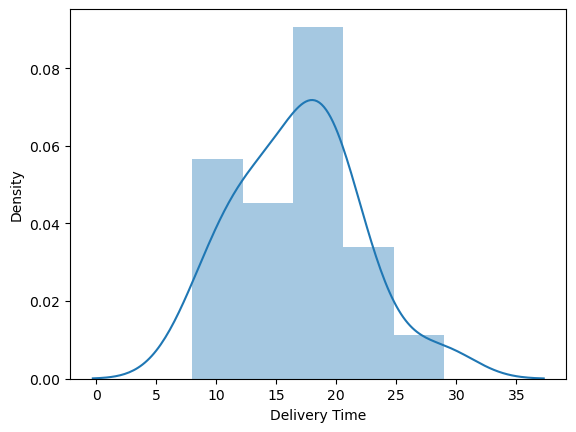

In [214]:
sns.distplot(dataset['Delivery Time'])

C:\Users\VAISHANVI\AppData\Local\Temp\ipykernel_11524\2444698888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

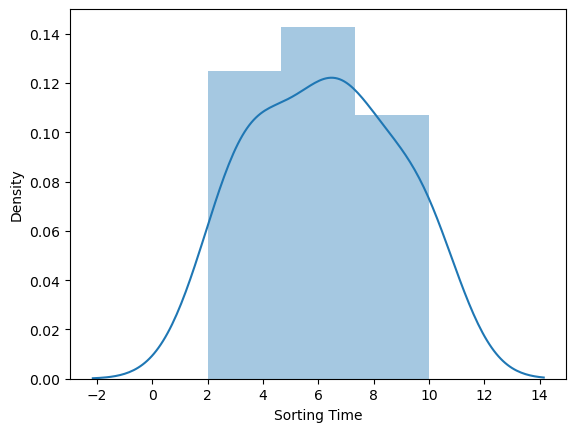

In [215]:
sns.distplot(dataset['Sorting Time'])

In [216]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


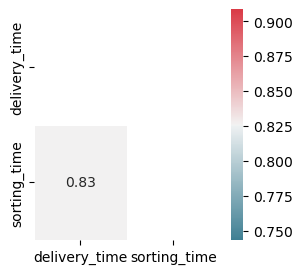

In [217]:
import matplotlib.pyplot as plt
corr=dataset.corr()
fig, ax = plt.subplots(figsize=(3, 3))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

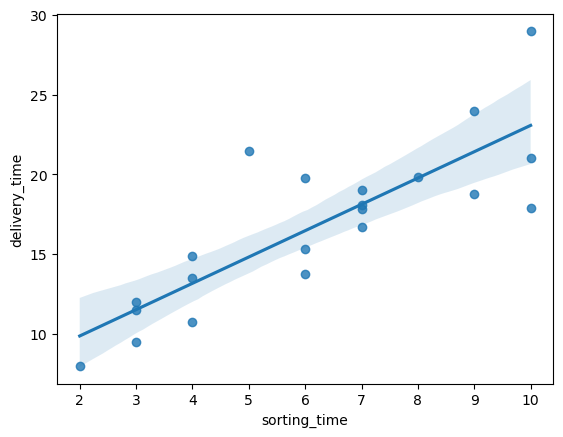

In [218]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Build a Model

In [219]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [225]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['delivery_time'], axis=1)
y = dataset['delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, shuffle=False)

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
parameters = {"copy_X" : np.arange(1,10,2)}
A_model = GridSearchCV(LinearRegression(),param_grid = parameters, scoring='neg_mean_squared_error',cv=2,verbose=12)
A_model.fit(X_train, y_train)
#best hyperparameter
print("Best prameter are :",A_model.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START copy_X=1....................................................
[CV 1/2; 1/5] END ...................copy_X=1;, score=-18.619 total time=   0.0s
[CV 2/2; 1/5] START copy_X=1....................................................
[CV 2/2; 1/5] END ...................copy_X=1;, score=-12.271 total time=   0.0s
[CV 1/2; 2/5] START copy_X=3....................................................
[CV 1/2; 2/5] END ...................copy_X=3;, score=-18.619 total time=   0.0s
[CV 2/2; 2/5] START copy_X=3....................................................
[CV 2/2; 2/5] END ...................copy_X=3;, score=-12.271 total time=   0.0s
[CV 1/2; 3/5] START copy_X=5....................................................
[CV 1/2; 3/5] END ...................copy_X=5;, score=-18.619 total time=   0.0s
[CV 2/2; 3/5] START copy_X=5....................................................
[CV 2/2; 3/5] END ...................copy_X=5;, s

C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a b

In [227]:
linear_modell=LinearRegression(n_jobs =20)
linear_modell.fit(X_train,y_train)

pred = linear_modell.predict( X_test)
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 2.28859872611465
MSE: 11.20522751242989
RMSE: 3.3474210240765783


In [228]:
import pickle
pickle.dump(linear_modell,open('liniear_modell.pkl','wb'))

In [241]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print(" predicted delivery time using sorting time 5 is:",pickeled_model.predict([[5]]))

 predicted delivery time using sorting time 5 is: [14.71525188]


C:\Logs\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [242]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print("predicted delivery time using sorting time 8 is:",pickeled_model.predict([[8]]))

predicted delivery time using sorting time 8 is: [19.66863926]


C:\Logs\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2) Salary_hike -> Build a prediction model for 

In [69]:
dataset=pd.read_csv(r"C:\Users\VAISHANVI\Downloads\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [70]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [71]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [72]:
dataset.duplicated().sum()

0

In [73]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\VAISHANVI\AppData\Local\Temp\ipykernel_11524\1750535190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

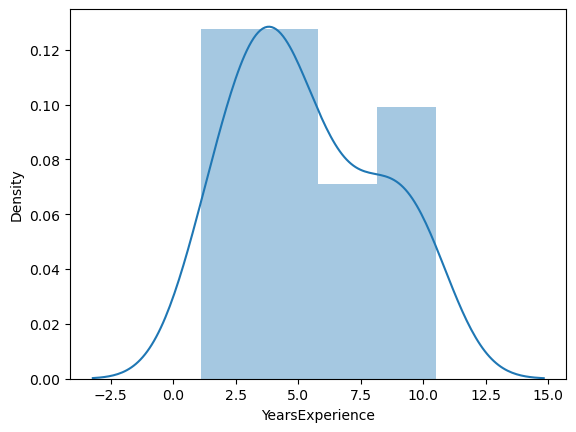

In [76]:
sns.distplot(dataset['YearsExperience'])

C:\Users\VAISHANVI\AppData\Local\Temp\ipykernel_11524\3010132517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

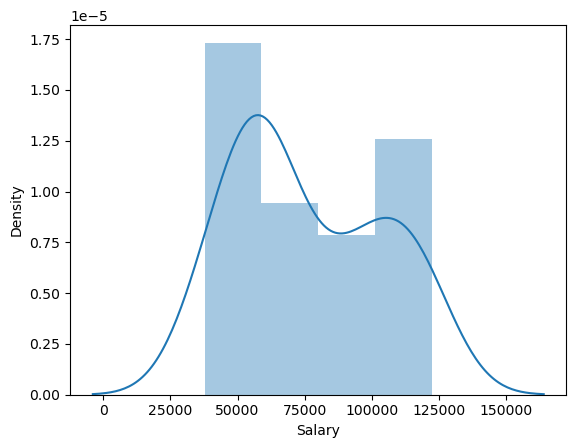

In [79]:
sns.distplot(dataset['Salary'])

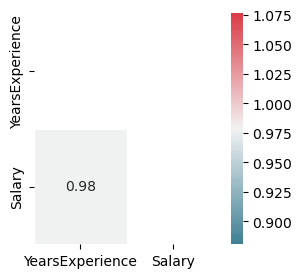

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [81]:
corr=dataset.corr()
fig, ax = plt.subplots(figsize=(3, 3))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()
dataset.corr()

In [120]:
dataset=dataset.rename({'YearsExperience':'yearsExperience', 'Salary':'salary'},axis=1)
dataset

,yearsExperience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

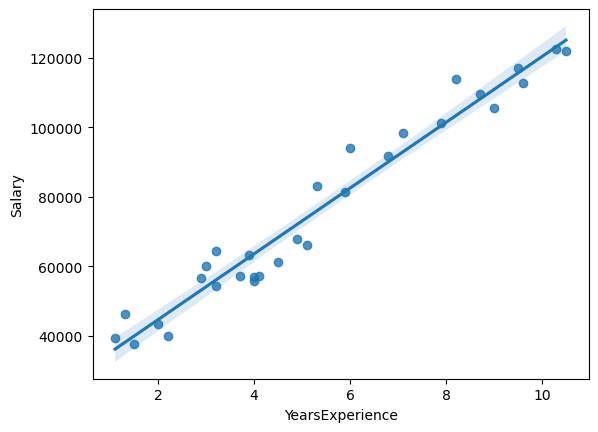

In [82]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [170]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['salary'], axis=1)
y = dataset['salary']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, shuffle=False)

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
parameters = {"copy_X" : np.arange(1,10,2)}
A_model = GridSearchCV(LinearRegression(),param_grid = parameters, scoring='neg_mean_squared_error',cv=2,verbose=12)
A_model.fit(X_train, y_train)
#best hyperparameter
print("Best prameter are :",A_model.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START copy_X=1....................................................
[CV 1/2; 1/5] END ............copy_X=1;, score=-174157744.000 total time=   0.0s
[CV 2/2; 1/5] START copy_X=1....................................................
[CV 2/2; 1/5] END .............copy_X=1;, score=-87194662.838 total time=   0.0s
[CV 1/2; 2/5] START copy_X=3....................................................
[CV 1/2; 2/5] END ............copy_X=3;, score=-174157744.000 total time=   0.0s
[CV 2/2; 2/5] START copy_X=3....................................................
[CV 2/2; 2/5] END .............copy_X=3;, score=-87194662.838 total time=   0.0s
[CV 1/2; 3/5] START copy_X=5....................................................
[CV 1/2; 3/5] END ............copy_X=5;, score=-174157744.000 total time=   0.0s
[CV 2/2; 3/5] START copy_X=5....................................................
[CV 2/2; 3/5] END .............copy_X=5;, score=-

C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Logs\Anaconda\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a b

In [191]:
linear_modell=LinearRegression(n_jobs =30)
linear_modell.fit(X_train,y_train)

pred = linear_modell.predict( X_test)
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 5353.262547285022
MSE: 35766738.23965806
RMSE: 5980.529929668278


In [188]:
import pickle
pickle.dump(linear_modell,open('liniear_modell.pkl','wb'))

In [243]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print("predicted salary hike for 5 yearexperience:",pickeled_model.predict([[5]]))

predicted salary hike for 5 yearexperience: [14.71525188]


C:\Logs\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [244]:
pickeled_model = pickle.load(open('liniear_modell.pkl','rb'))
print("predicted salary hike for 8 yearexperience:",pickeled_model.predict([[8]]))

predicted salary hike for 8 yearexperience: [19.66863926]


C:\Logs\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
